In [1]:
import sys
import os
import tempfile
import json 

import numpy as np
from process_bigraph import pp
from process_bigraph.experiments.parameter_scan import RunProcess


sys.path.insert(0, '..')


from biosimulator_processes import CORE
from biosimulator_processes.services.rest_service import BiosimulationsRestService
from biosimulator_processes.instance import generate_ode_instance, plot_ode_output_data
from biosimulator_processes.steps.ode_simulation import CopasiStep, TelluriumStep, AmiciStep
from biosimulator_processes.io import parse_expected_timecourse_config

Available processes:
[ 'console-emitter',
  'ram-emitter',
  'composite',
  'cobra',
  'copasi',
  'tellurium',
  'amici']
Available processes:
[ 'console-emitter',
  'ram-emitter',
  'composite',
  'cobra',
  'copasi',
  'tellurium',
  'amici',
  'copasi-step',
  'tellurium-step',
  'amici-step',
  'plotter',
  'plotter2d']


In [2]:
omex_dir = '../test_suite/examples/sbml-core/Caravagna-J-Theor-Biol-2010-tumor-suppressive-oscillations'

### Example A: Run single `copasi-step` using just a single omex archive dirpath as entrypoint. The Time config is inferred from the respected results file. OMEX archives provide a layer of verification prior to the simulation.

In [3]:
copasi_step = CopasiStep(archive_dirpath=omex_dir)

[0.0, 0.2, 0.4, 199.8, 200]
../test_suite/examples/sbml-core/Caravagna-J-Theor-Biol-2010-tumor-suppressive-oscillations/Caravagna2010.xml
True


In [4]:
copasi_step.outputs()

{'time': 'list[float]',
 'floating_species': {'T': 'float', 'E': 'float', 'I': 'float'}}

In [20]:
copasi_result = copasi_step.update({})

/Users/alex/Desktop/uchc_work/repos/biosimulator-processes/demos/../biosimulator_processes/steps/ode_simulation.py:213: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



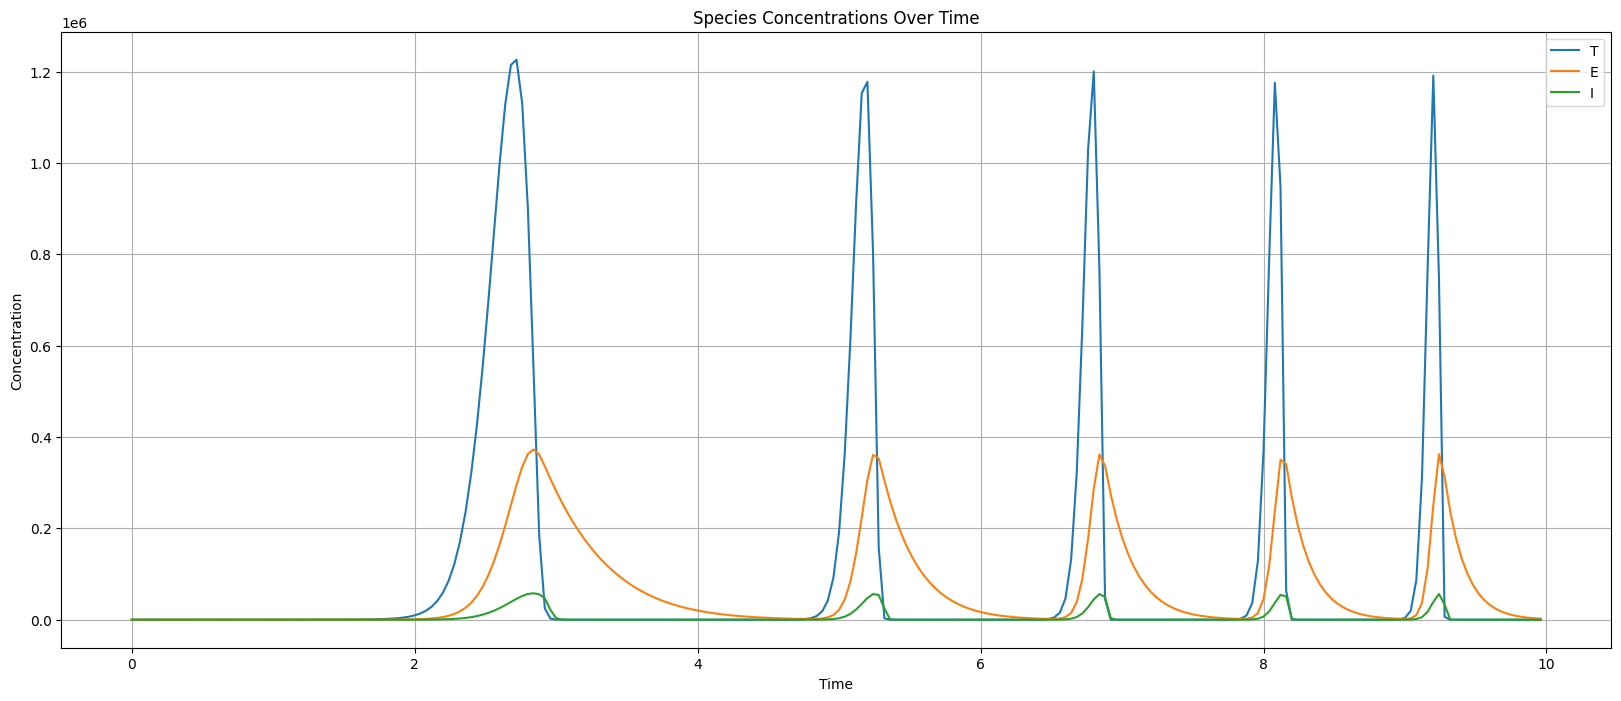

In [6]:
plot_ode_output_data(copasi_result, sample_size=250)

In [7]:
# Using the higher-level api
from biosimulator_processes.instance import run_copasi_step_from_omex

copasi_results_from_api = run_copasi_step_from_omex(omex_dir)

[0.0, 0.2, 0.4, 199.8, 200]
../test_suite/examples/sbml-core/Caravagna-J-Theor-Biol-2010-tumor-suppressive-oscillations/Caravagna2010.xml
True


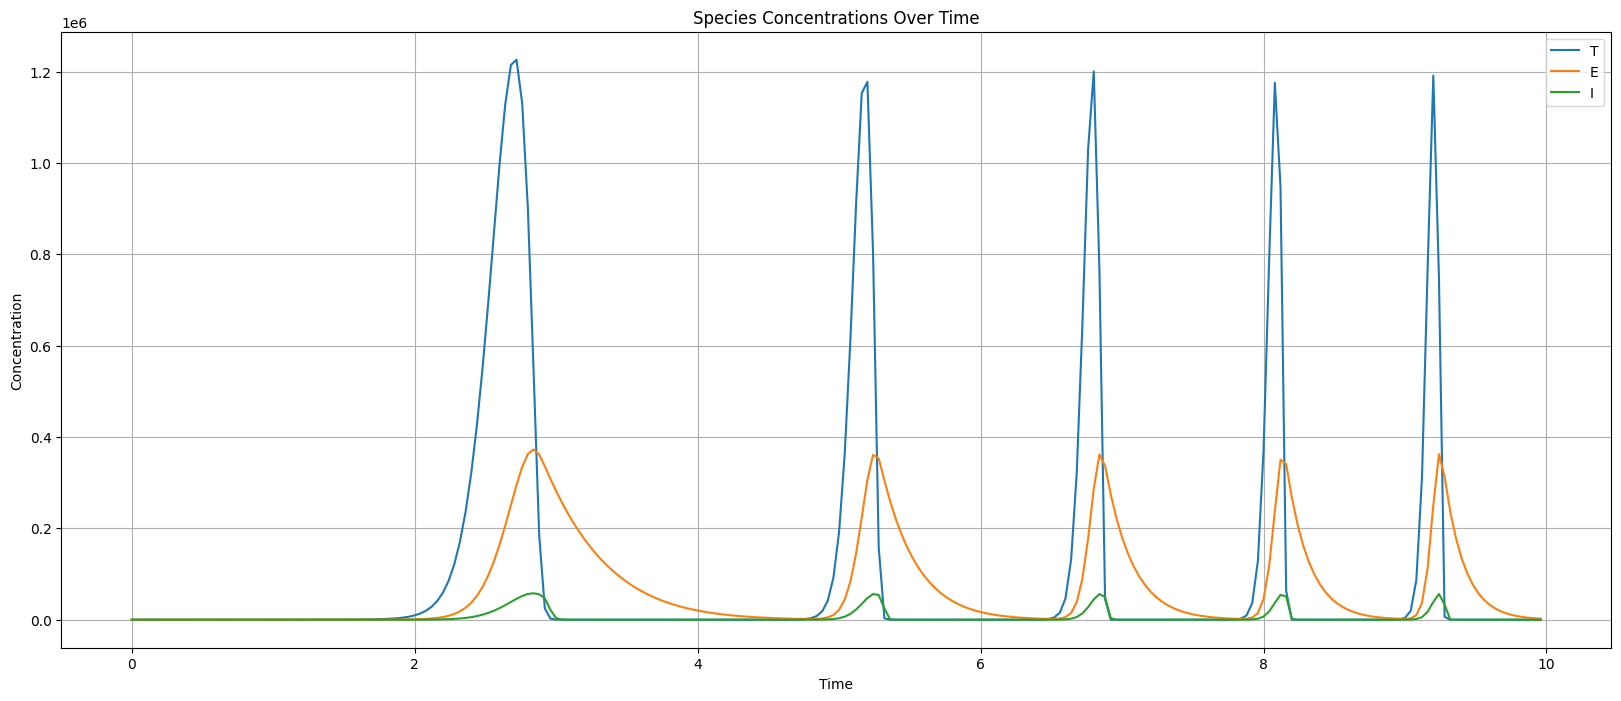

In [8]:
# results have plotting built-in

copasi_results_from_api.plot(sample_size=250)

In [9]:
from biosimulator_processes.steps.ode_simulation import TelluriumStep


tellurium_step = TelluriumStep(archive_dirpath=omex_dir)

[0.0, 0.2, 0.4, 199.8, 200]
../test_suite/examples/sbml-core/Caravagna-J-Theor-Biol-2010-tumor-suppressive-oscillations/Caravagna2010.xml
True


In [19]:
tellurium_results = tellurium_step.simulator.simulate(0, tellurium_step.duration, tellurium_step.num_steps)


[2.00000000e+02 3.60315569e+05 3.62883668e+05 5.62711367e+04]

### Example B: Specify an sbml model filepath and custom time configuration

In [ ]:
model_fp = os.path.join(omex_dir, 'Caravagna2010.xml')
step_size = 0.25
duration = 100.0
num_steps = 200.0

### Example C: Specify a `process_bigraph`-style `Step` configuration which adhere's to the given implementation's `config_schema`; in this case, `ODESimulation`.

In [ ]:
ode_process_config = {
    'model': {'model_source': model_fp},
    'time_config': {
        'step_size': 0.01,
        'duration': 100.0,
        'num_steps': 2000.0
    }
}

In [ ]:
copasi_step.t[-2]

In [ ]:
dur = 200
n = 1000 

t = np.linspace(0, dur, n)

In [ ]:
t[-2]

In [ ]:
copasi_step.duration

In [ ]:
from biosimulator_processes.io import parse_expected_timecourse_config


p = parse_expected_timecourse_config(omex_dir)

In [ ]:
p

In [ ]:
copasi_step.t[-1]

In [ ]:
copasi_step.t.shape

In [ ]:
report_outputs = BiosimulationsRestService.read_report_outputs(os.path.join(omex_dir, 'reports.h5'))

In [ ]:
report_outputs.data[1].data.shape

In [ ]:
np.array(copasi_result['floating_species']['T']).shape